In [90]:
import pandas as pd
import numpy as np

### Funtions

In [190]:
def rolling_mean_and_std(dataframe, column, window=4):
    """
    Bcalculates the moving average and the standard deviation for a given column in a DataFrame.

    :param dataframe: pandas DataFrame that contains the data
    :param column: the name of the column for which the moving average and standard deviation are to be calculated
    :param window: the window size for the calculations (default is 4)
    :return: a DataFrame with the calculated moving averages and standard deviations
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame")

   
    rolling_mean = dataframe[column].rolling(window=window).mean()

    rolling_std = dataframe[column].rolling(window=window).std()


    result = pd.DataFrame({
        'rolling_mean': rolling_mean,
        'rolling_std': rolling_std
    })

    return result

In [185]:
from statsmodels.tsa.stattools import kpss

def kpss_test(dataframe, column):
    """
    Performs the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test on a given column in a DataFrame.

    :param dataframe: pandas DataFrame that contains the data
    :param column: the name of the column for which the KPSS test is to be performed
    :return: A dictionary with the test results, including KPSS statistics, p-value and critical values
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame")

  
    time_series = dataframe[column] 

    
    kpss_result = kpss(time_series, regression='c', nlags='auto')

    crit_value_10 =kpss_result[3]['10%'] 
    crit_value_5 =kpss_result[3]['5%'] 
    crit_value_2 =kpss_result[3]['2.5%'] 
    crit_value_1 = kpss_result[3]['1%'] 

    print('Kwiatkowski-Phillips-Schmidt-Shin test:')
    print('                              ')
    print('-------------------------------')
    print(f'KPSS Statistic:: {(kpss_result[0]).round(4)}')
    print(f'p-value: {(kpss_result[1]).round(8)}')
    print(f'Number of lags:{kpss_result[2]}')
    print('-------------------------------')
    print('Critical Values:')
    print(f'10%: {(crit_value_10)}')
    print(f'5%: {(crit_value_5)}')
    print(f'2.5%: {(crit_value_2)}')
    print(f'1%: {(crit_value_1)}')
    print('-------------------------------')

    

In [184]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataframe, column):
    """
    Performs the Augmented Dickey-Fuller (ADF) test on a given column in a DataFrame.

    :param dataframe: pandas DataFrame that contains the data
    :param column: the name of the column for which the ADF test is to be performed
    :return: A dictionary with the test results, including ADF statistics, p-value and critical values
    """
    if column not in dataframe.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame")

    
    time_series = dataframe[column]

    
    adf_result = adfuller(time_series)

    t_values_1 = adf_result[4]['1%'] 
    t_values_5 = adf_result[4]['5%'] 
    t_values_10 = adf_result[4]['10%'] 



       
    print('Augmented Dickey Fuller Test:')
    print('                              ')
    print('-------------------------------')
    print(f'ADF Statistic: {(adf_result[0]).round(4)}')
    print(f'p-value: {(adf_result[1]).round(8)}')
    print(f'Number of lags:{adf_result[2]}')
    print(f'Number of observations:{adf_result[3]}')
    print('-------------------------------')
    print('Critical Values:')
    print(f'1%: {(t_values_1).round(4)}')
    print(f'5%: {(t_values_5).round(4)}')
    print(f'10%: {(t_values_10).round(4)}')
    print('-------------------------------')


In [91]:
Prices = pd.read_csv('../data/Prices_clean.csv', encoding='utf-8',thousands=',')
Prices_GER_monthly = pd.read_csv('../data/Prices_GER_monthly.csv', encoding='utf-8',thousands=',')
Prices_GER_weekly = pd.read_csv('../data/Prices_GER_weekly.csv', encoding='utf-8',thousands=',')

Inflation_weekly_electricity=pd.read_csv('../data/Inflation_weekly_electricity.csv', encoding='utf-8',thousands=',')
Inflation_monthly_electricity=pd.read_csv('../data/Inflation_monthly_electricity.csv', encoding='utf-8',thousands=',')

In [92]:
Prices['Start'] = pd.to_datetime(Prices['Start'])
Prices = Prices.set_index('Start')

Prices_GER_monthly['Start'] = pd.to_datetime(Prices_GER_monthly['Start'])
Prices_GER_monthly = Prices_GER_monthly.set_index('Start')

Prices_GER_weekly['Start'] = pd.to_datetime(Prices_GER_weekly['Start'])
Prices_GER_weekly = Prices_GER_weekly.set_index('Start')

Inflation_weekly_electricity['TIME_PERIOD'] = pd.to_datetime(Inflation_weekly_electricity['TIME_PERIOD'])
Inflation_weekly_electricity = Inflation_weekly_electricity.set_index('TIME_PERIOD')

Inflation_monthly_electricity['TIME_PERIOD'] = pd.to_datetime(Inflation_monthly_electricity['TIME_PERIOD'])
Inflation_monthly_electricity = Inflation_monthly_electricity.set_index('TIME_PERIOD')

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.rcParams.update({'font.size': 13})

## Splitting of the data

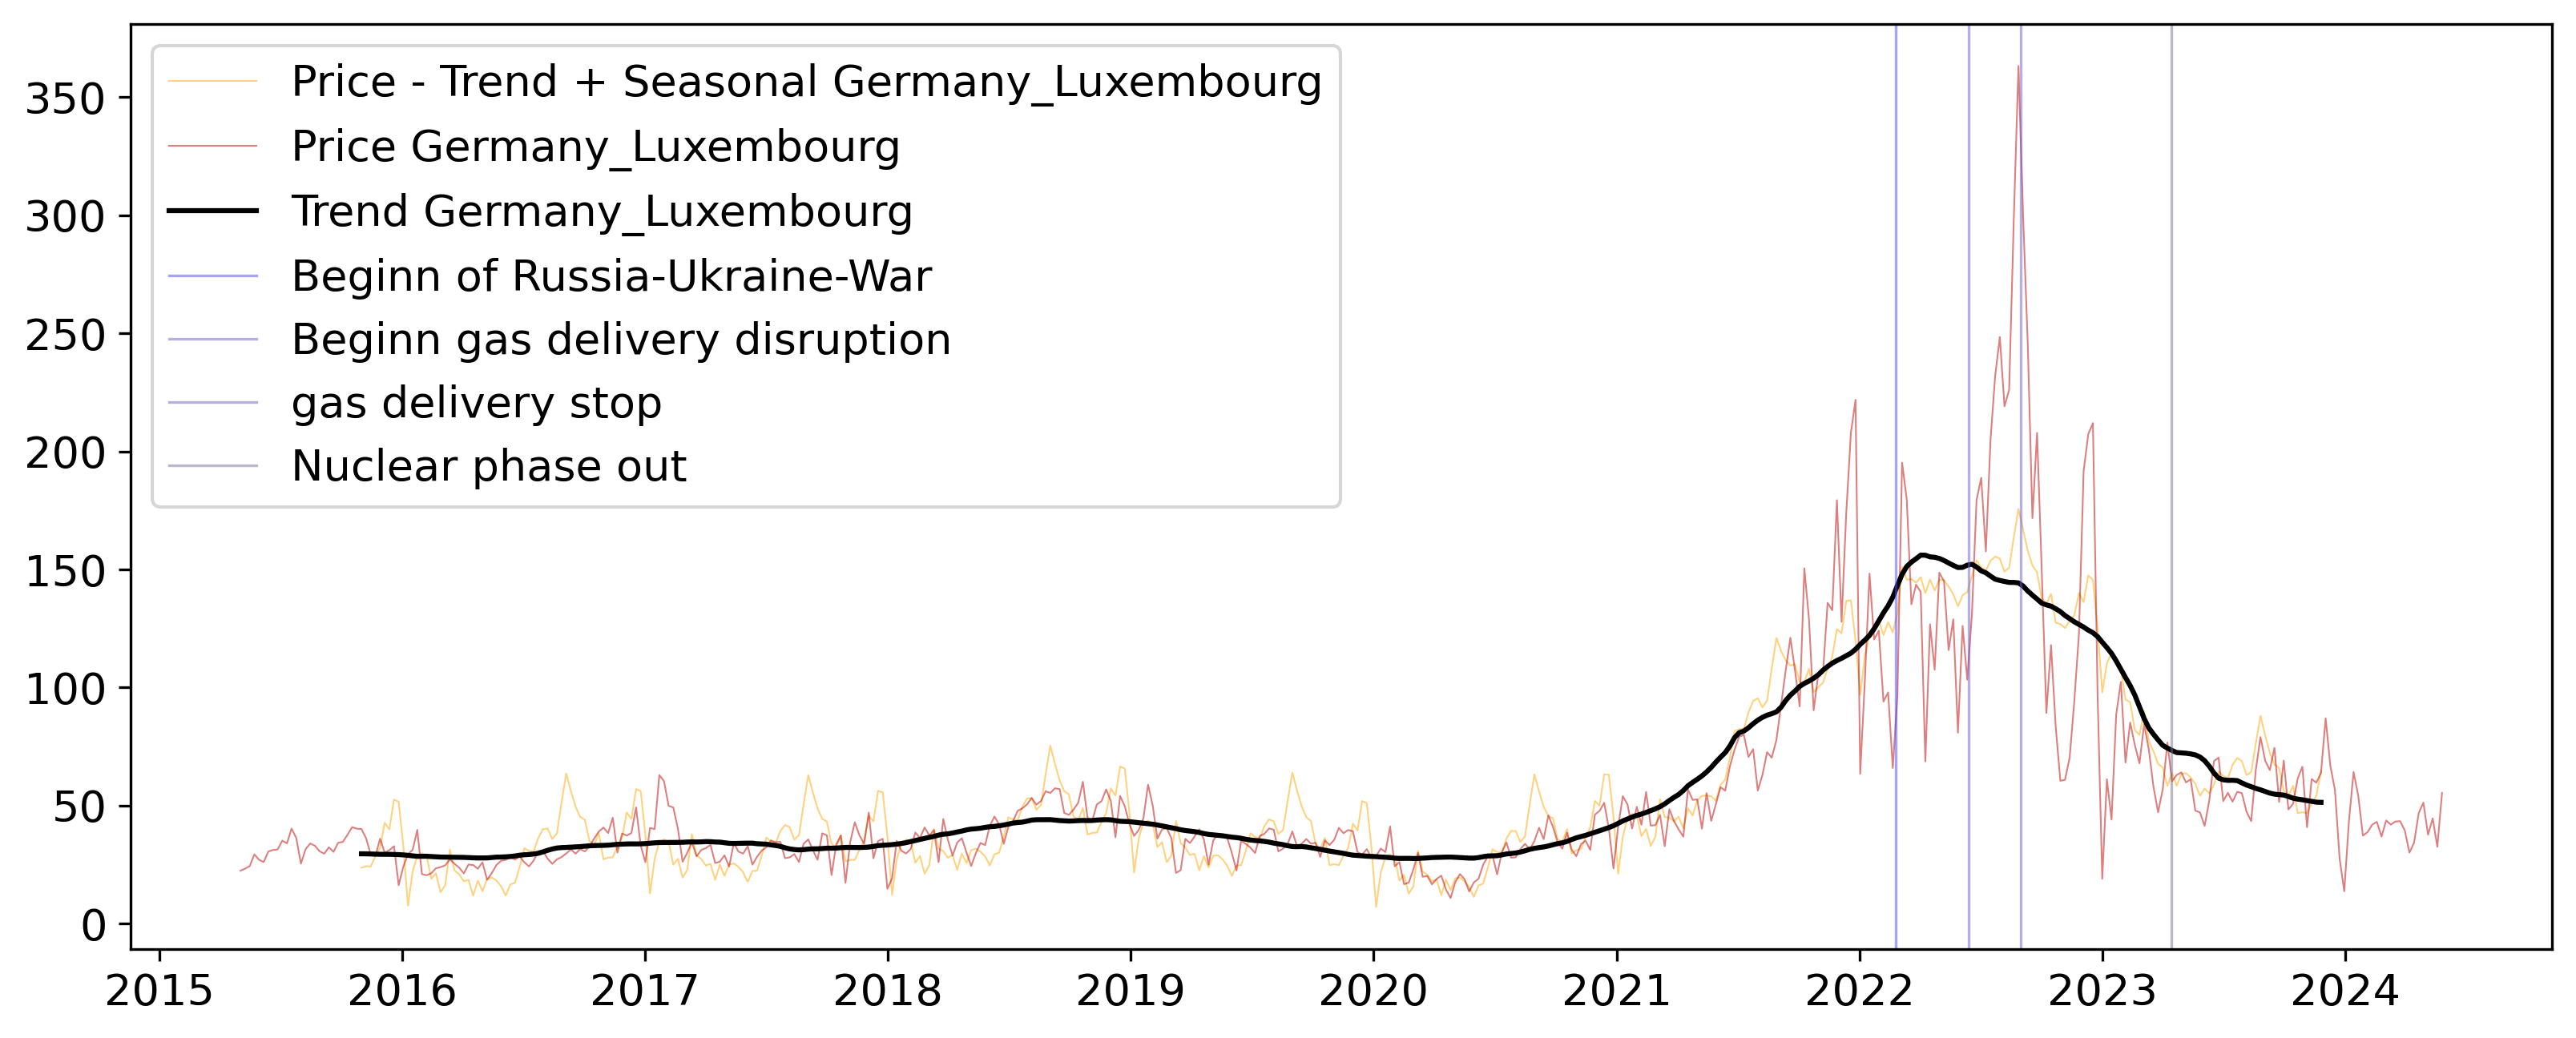

In [94]:
plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Trend+Seasonal_adjusted'], label = 'Price - Trend + Seasonal Germany_Luxembourg', color = '#ffa600',alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Germany_Luxembourg_adjusted'], label = 'Price Germany_Luxembourg',color='#bc0000', alpha = .5, linewidth = 0.5 )
plt.plot(Prices_GER_weekly['Trend_adjusted'], label = 'Trend Germany_Luxembourg',color='#000000')# ,alpha = .2, linewidth = 0.5 )


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()

In [95]:
Prices_GER_weekly['Trend_Slope'] = Prices_GER_weekly['Trend'].diff()
Prices_GER_weekly['Trend_Slope_adjusted'] = Prices_GER_weekly['Trend_adjusted'].diff()

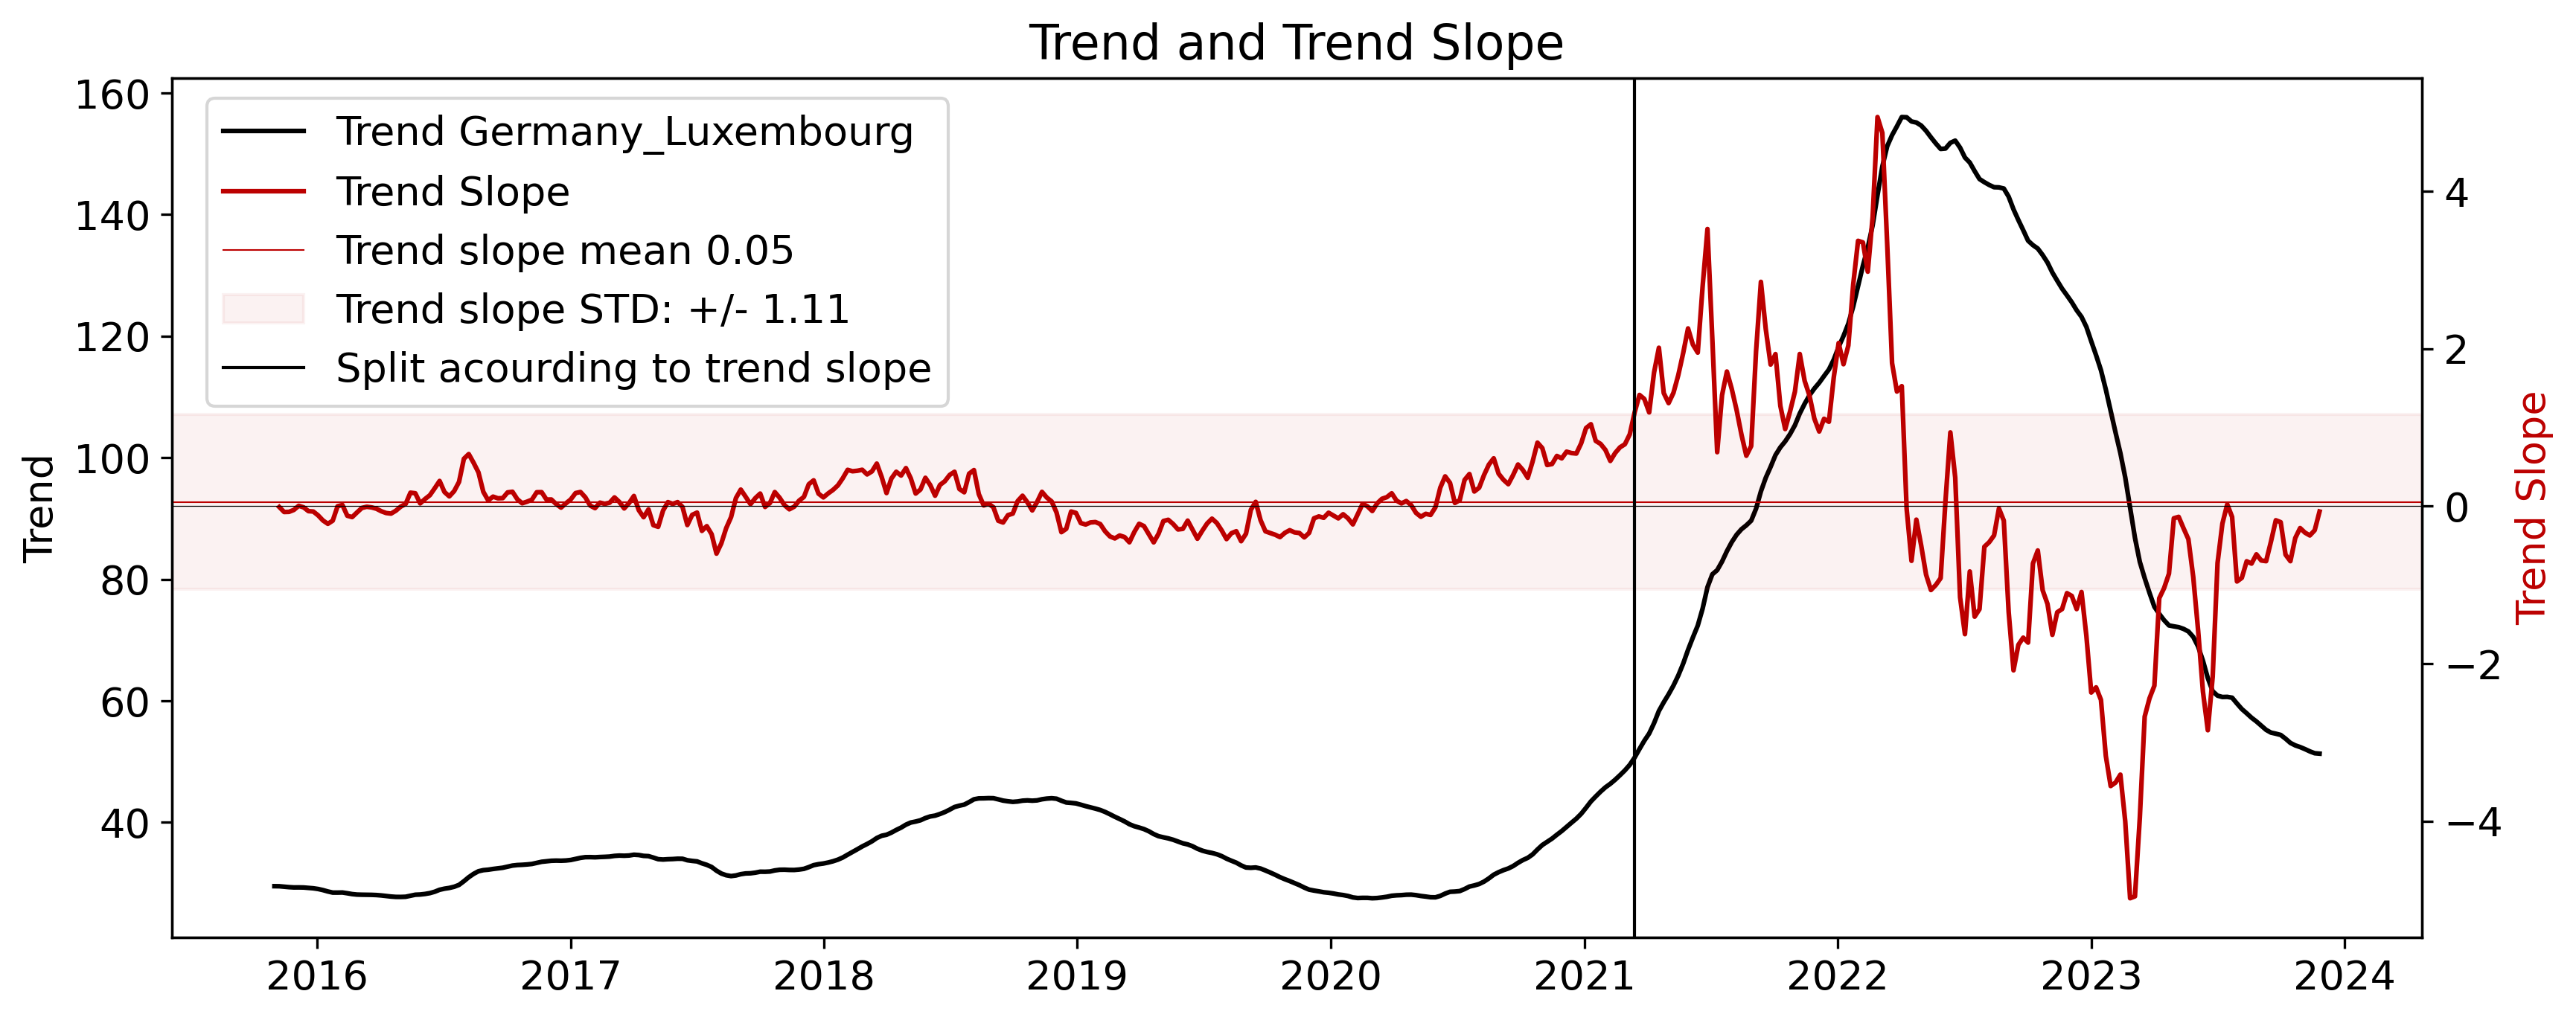

In [96]:
Trend_slope_std = Prices_GER_weekly['Trend_Slope_adjusted'].std()
Trend_slope_mean = Prices_GER_weekly['Trend_Slope_adjusted'].mean()


fig, ax1 = plt.subplots(figsize=(13, 5), dpi=300)


ax1.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend_adjusted'], label='Trend Germany_Luxembourg', color='#000000')
ax1.set_ylabel('Trend', color='#000000')


ax2 = ax1.twinx()
ax2.plot(Prices_GER_weekly.index, Prices_GER_weekly['Trend_Slope_adjusted'], label='Trend Slope', color='#bc0000')

ax2.axhline(y=Trend_slope_mean, color = '#bc0000', linewidth = 0.5, label = f'Trend slope mean {(Trend_slope_mean).round(2)}')
ax2.axhspan(ymin=Trend_slope_mean-Trend_slope_std,ymax=Trend_slope_mean+Trend_slope_std, alpha = 0.05, label = f'Trend slope STD: +/- {(Trend_slope_std).round(2)}',color = '#bc0000')

ax2.axhline(y=0, color = '#000000', linewidth = 0.3)
ax2.set_ylabel('Trend Slope', color='#bc0000')

plt.axvline(x=dt.datetime(2021,3,14),color = '#000000', alpha = 1, linewidth = 1,  label = 'Split acourding to trend slope')

fig.legend(loc = 'upper left', bbox_to_anchor=(0.13, 0.88))
plt.title('Trend and Trend Slope')
plt.show()

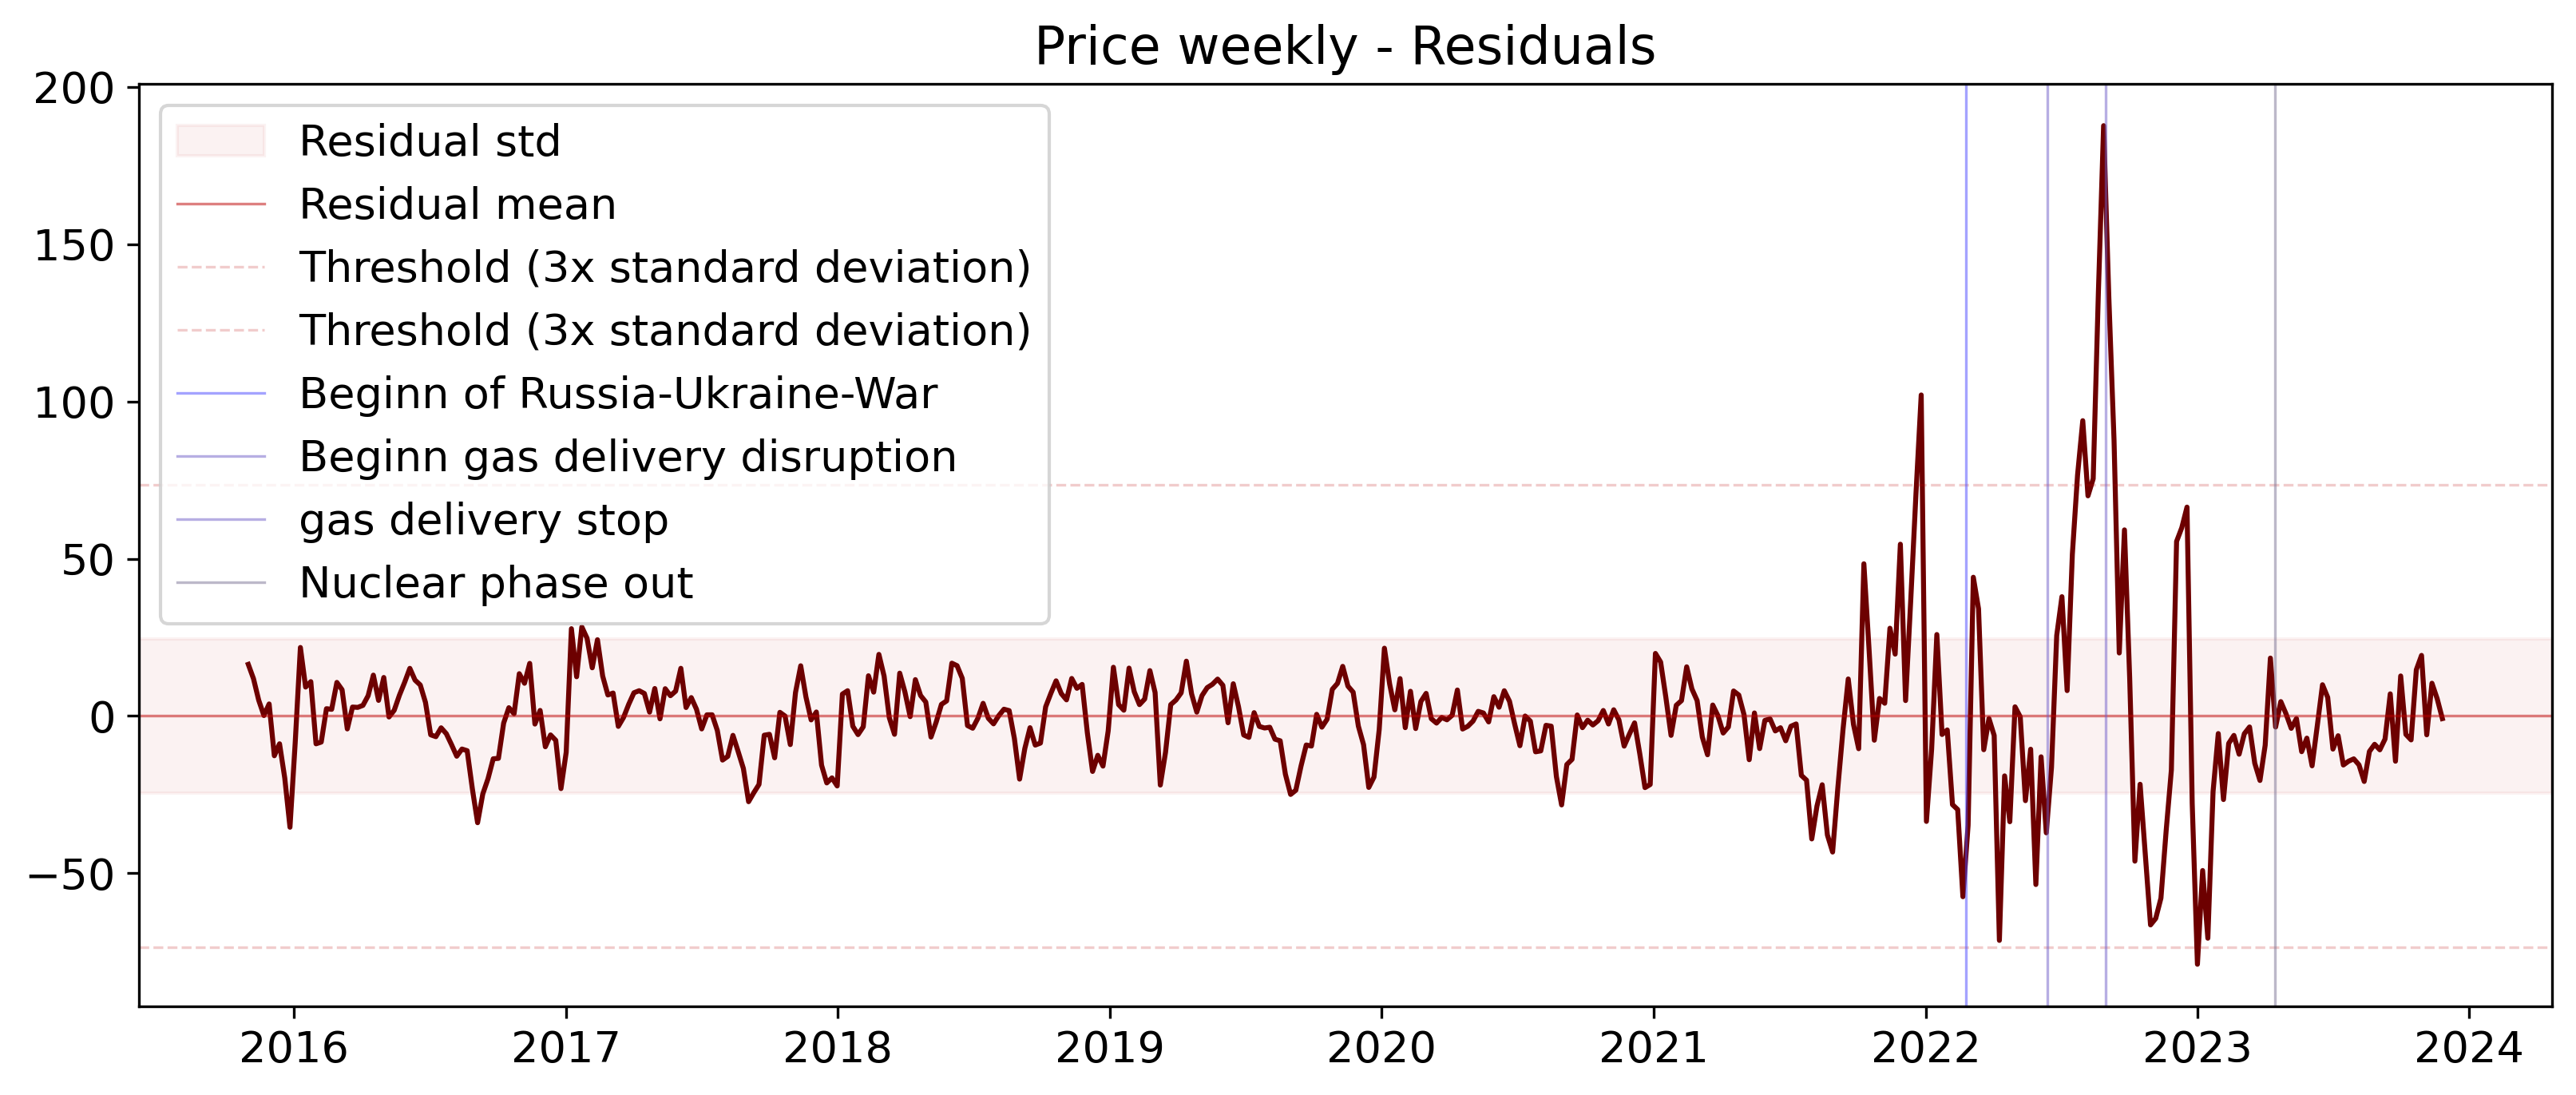

mean_Prices_GER_weekly_residual: 0.12770983216438064
std_Prices_GER_weekly_residual: 24.509322794739003


In [97]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], color = '#6d0000')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {mean_Prices_GER_weekly_residual}')
print(f'std_Prices_GER_weekly_residual: {std_Prices_GER_weekly_residual}')

A look at the residuals provides a clearer picture of our outliers. Several extreme points stand out. 

In [98]:
marker = Prices_GER_weekly[['Residual_adjusted']].loc[(Prices_GER_weekly['Residual_adjusted'] >=3*std_Prices_GER_weekly_residual)|(Prices_GER_weekly['Residual_adjusted'] <=-3*std_Prices_GER_weekly_residual)].sort_values('Residual_adjusted', ascending = False)


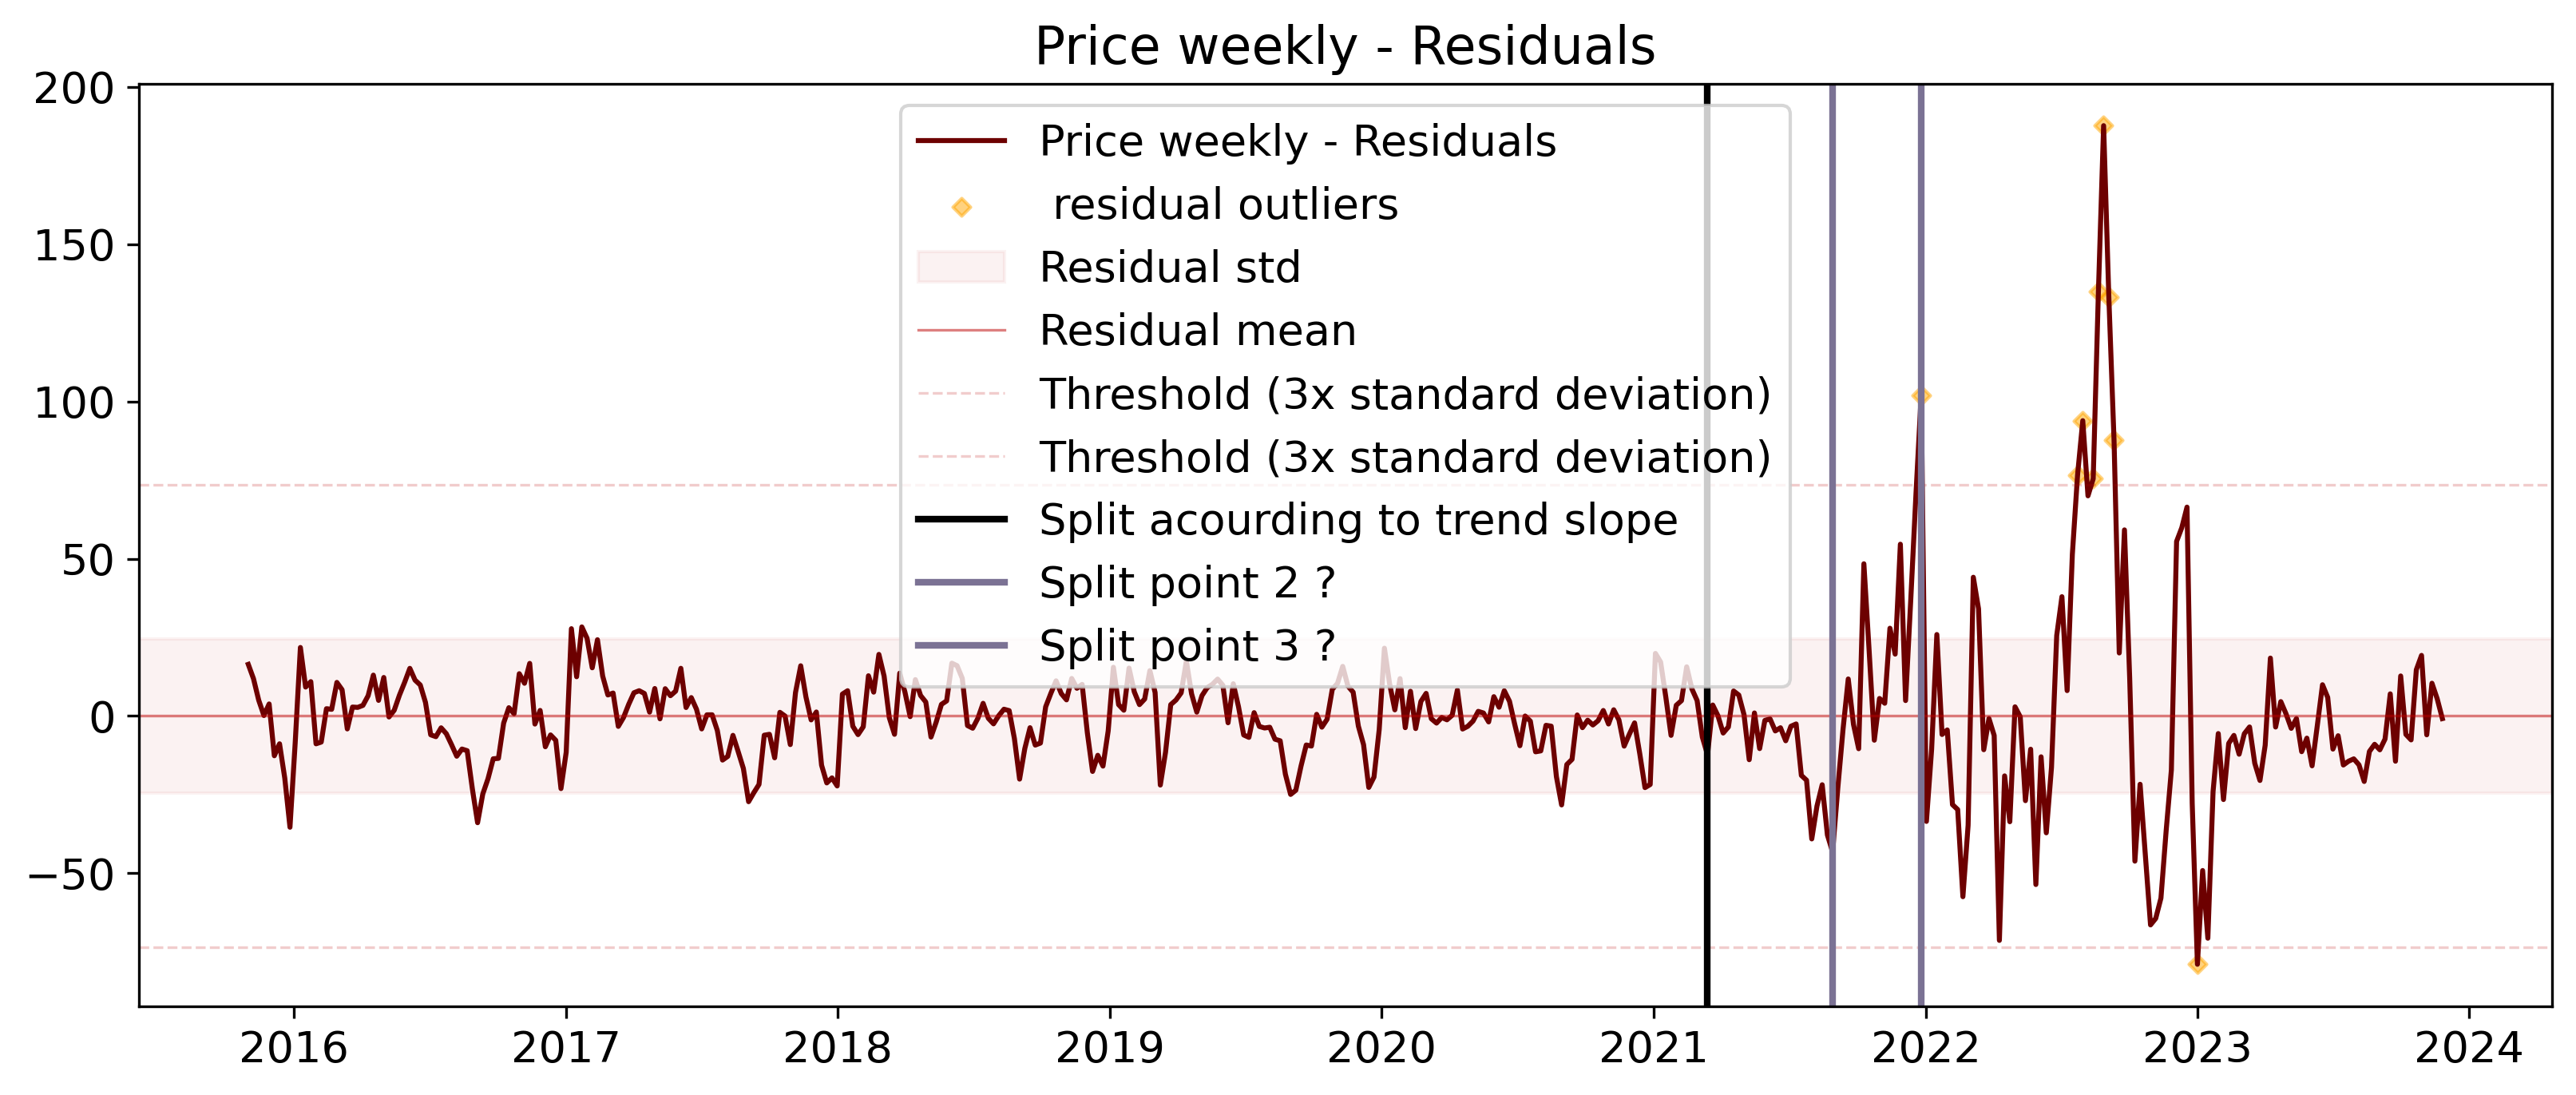

mean_Prices_GER_weekly_residual: 0.13
std_Prices_GER_weekly_residual: 24.51


In [99]:
mean_Prices_GER_weekly_residual = np.mean(Prices_GER_weekly['Residual_adjusted'])
std_Prices_GER_weekly_residual = np.std(Prices_GER_weekly['Residual_adjusted'])
threshold = std_Prices_GER_weekly_residual*3

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly['Residual_adjusted'], color = '#6d0000', label = 'Price weekly - Residuals')
plt.scatter(x=marker.index, y= marker['Residual_adjusted'], color = '#ffa600',alpha = 0.5, s=14,  marker ='D' , label = ' residual outliers')
plt.axhspan(ymin=-std_Prices_GER_weekly_residual,ymax=std_Prices_GER_weekly_residual, alpha = 0.05, label = 'Residual std',color = '#bc0000')
plt.axhline(y=mean_Prices_GER_weekly_residual,color = '#bc0000', alpha = .5, linewidth = .8,  label = 'Residual mean')

plt.axhline(y=threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')
plt.axhline(y=-threshold,color = '#bc0000', alpha = .2, linewidth = .8,  label = 'Threshold (3x standard deviation)', linestyle = '--')


#Question for Miranda:
plt.axvline(x=dt.datetime(2021,3,14),color = '#000000', alpha = 1, linewidth = 2,  label = 'Split acourding to trend slope')

plt.axvline(x=dt.datetime(2021,8,29),color = '#7b7294', alpha = 1, linewidth = 2,  label = 'Split point 2 ? ')
plt.axvline(x=dt.datetime(2021,12,26),color = '#7b7294', alpha = 1, linewidth = 2,  label = 'Split point 3 ? ')

plt.legend()
plt.title('Price weekly - Residuals')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {(mean_Prices_GER_weekly_residual).round(2)}')
print(f'std_Prices_GER_weekly_residual: {(std_Prices_GER_weekly_residual).round(2)}')

Choosing of the split point

In [100]:
date_range_change = '2021-03-14 00:00:00'
date_range_change_dt = dt.datetime.strptime(date_range_change, '%Y-%m-%d %H:%M:%S')

In [101]:
Prices_range_1 = Prices.loc[Prices.index <= date_range_change]
Prices_range_2 = Prices.loc[Prices.index > date_range_change]

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import month_plot


def decomposition_df(df, column, frequency='MS',aggregation_method='sum', type='additive'):
    '''
    Process a dataframe to decompose its time series data and add trend, seasonal, residual, and trend+seasonal columns.
    
    Parameters:
    - df: pandas DataFrame containing the data to be processed
    - column: the column to be processed in the dataframe
    - frequency: the frequency of the decomposition, default monthly 
        - D - daily
        - h- hourly
        - W- weekly 

        look here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
    -aggregation_method: the method of the decomposition, default sum
        -mean
        -min
        -max


    -type: the used model in the decomposition, default = additive
        - multiplicative 
    
    
    Returns:
    - df_Frequency: the processed DataFrame with additional columns
    '''
    aggregation_func = getattr(pd.DataFrame, aggregation_method)
    df_Frequency=df[[column]].resample(frequency).apply(aggregation_func)
    decompositon= seasonal_decompose(df_Frequency[column], model=type)


    df_Frequency['Trend'] = decompositon.trend
    df_Frequency['Seasonal'] = decompositon.seasonal
    df_Frequency['Residual'] = decompositon.resid
    df_Frequency['Trend+Seasonal'] = df_Frequency['Seasonal'] + df_Frequency['Trend']

    return df_Frequency

In [103]:
Prices_GER_weekly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'W', 'mean')
Prices_GER_weekly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'W', 'mean').drop(index='2021-03-14')


In [104]:
Prices_GER_monthly_date_range_1 = decomposition_df(Prices_range_1, 'Germany_Luxembourg', 'MS', 'mean')
Prices_GER_monthly_date_range_2 = decomposition_df(Prices_range_2, 'Germany_Luxembourg', 'MS', 'mean').drop(index='2021-03-01')

In [105]:
Inflation_weekly_electricity_date_range_1 = Inflation_weekly_electricity.loc[Inflation_weekly_electricity.index <= date_range_change]
Inflation_weekly_electricity_date_range_2 = Inflation_weekly_electricity.loc[Inflation_weekly_electricity.index > date_range_change]

Inflation_monthly_electricity_date_range_1 = Inflation_monthly_electricity.loc[Inflation_monthly_electricity.index <= date_range_change]
Inflation_monthly_electricity_date_range_2 = Inflation_monthly_electricity.loc[Inflation_monthly_electricity.index > date_range_change]

In [106]:
Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'] = Prices_GER_weekly_date_range_1['Germany_Luxembourg'] / Inflation_weekly_electricity_date_range_1['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'], model='additive')


Prices_GER_weekly_date_range_1['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly_date_range_1['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly_date_range_1['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly_date_range_1['Trend+Seasonal_adjusted'] = Prices_GER_weekly_date_range_1['Seasonal_adjusted'] + Prices_GER_weekly_date_range_1['Trend_adjusted']




Prices_GER_weekly_date_range_2['Germany_Luxembourg_adjusted'] = Prices_GER_weekly_date_range_2['Germany_Luxembourg'] / Inflation_weekly_electricity_date_range_2['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_weekly_date_range_2['Germany_Luxembourg_adjusted'], model='additive')


Prices_GER_weekly_date_range_2['Trend_adjusted'] = decompositon.trend
Prices_GER_weekly_date_range_2['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_weekly_date_range_2['Residual_adjusted'] = decompositon.resid
Prices_GER_weekly_date_range_2['Trend+Seasonal_adjusted'] = Prices_GER_weekly_date_range_2['Seasonal_adjusted'] + Prices_GER_weekly_date_range_2['Trend_adjusted']

In [107]:
Prices_GER_weekly_date_range_2['Germany_Luxembourg_adjusted']

Start
2021-03-21    48.397841
2021-03-28    43.349406
2021-04-04    39.812210
2021-04-11    36.794987
2021-04-18    56.730667
                ...    
2024-04-28    51.171819
2024-05-05    37.595816
2024-05-12    44.510997
2024-05-19    32.478153
2024-05-26    55.283438
Freq: W-SUN, Name: Germany_Luxembourg_adjusted, Length: 167, dtype: float64

In [108]:
Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'] = Prices_GER_monthly_date_range_1['Germany_Luxembourg'] / Inflation_monthly_electricity_date_range_1['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_monthly_date_range_1['Trend_adjusted'] = decompositon.trend
Prices_GER_monthly_date_range_1['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_monthly_date_range_1['Residual_adjusted'] = decompositon.resid
Prices_GER_monthly_date_range_1['Trend+Seasonal_adjusted'] = Prices_GER_monthly_date_range_1['Seasonal_adjusted'] + Prices_GER_monthly_date_range_1['Trend_adjusted']



Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'] = Prices_GER_monthly_date_range_2['Germany_Luxembourg'] / Inflation_monthly_electricity_date_range_2['OBS_VALUE'] *100
decompositon= seasonal_decompose(Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'], model='additive')

Prices_GER_monthly_date_range_2['Trend_adjusted'] = decompositon.trend
Prices_GER_monthly_date_range_2['Seasonal_adjusted'] = decompositon.seasonal
Prices_GER_monthly_date_range_2['Residual_adjusted'] = decompositon.resid
Prices_GER_monthly_date_range_2['Trend+Seasonal_adjusted'] = Prices_GER_monthly_date_range_2['Seasonal_adjusted'] + Prices_GER_monthly_date_range_2['Trend_adjusted']

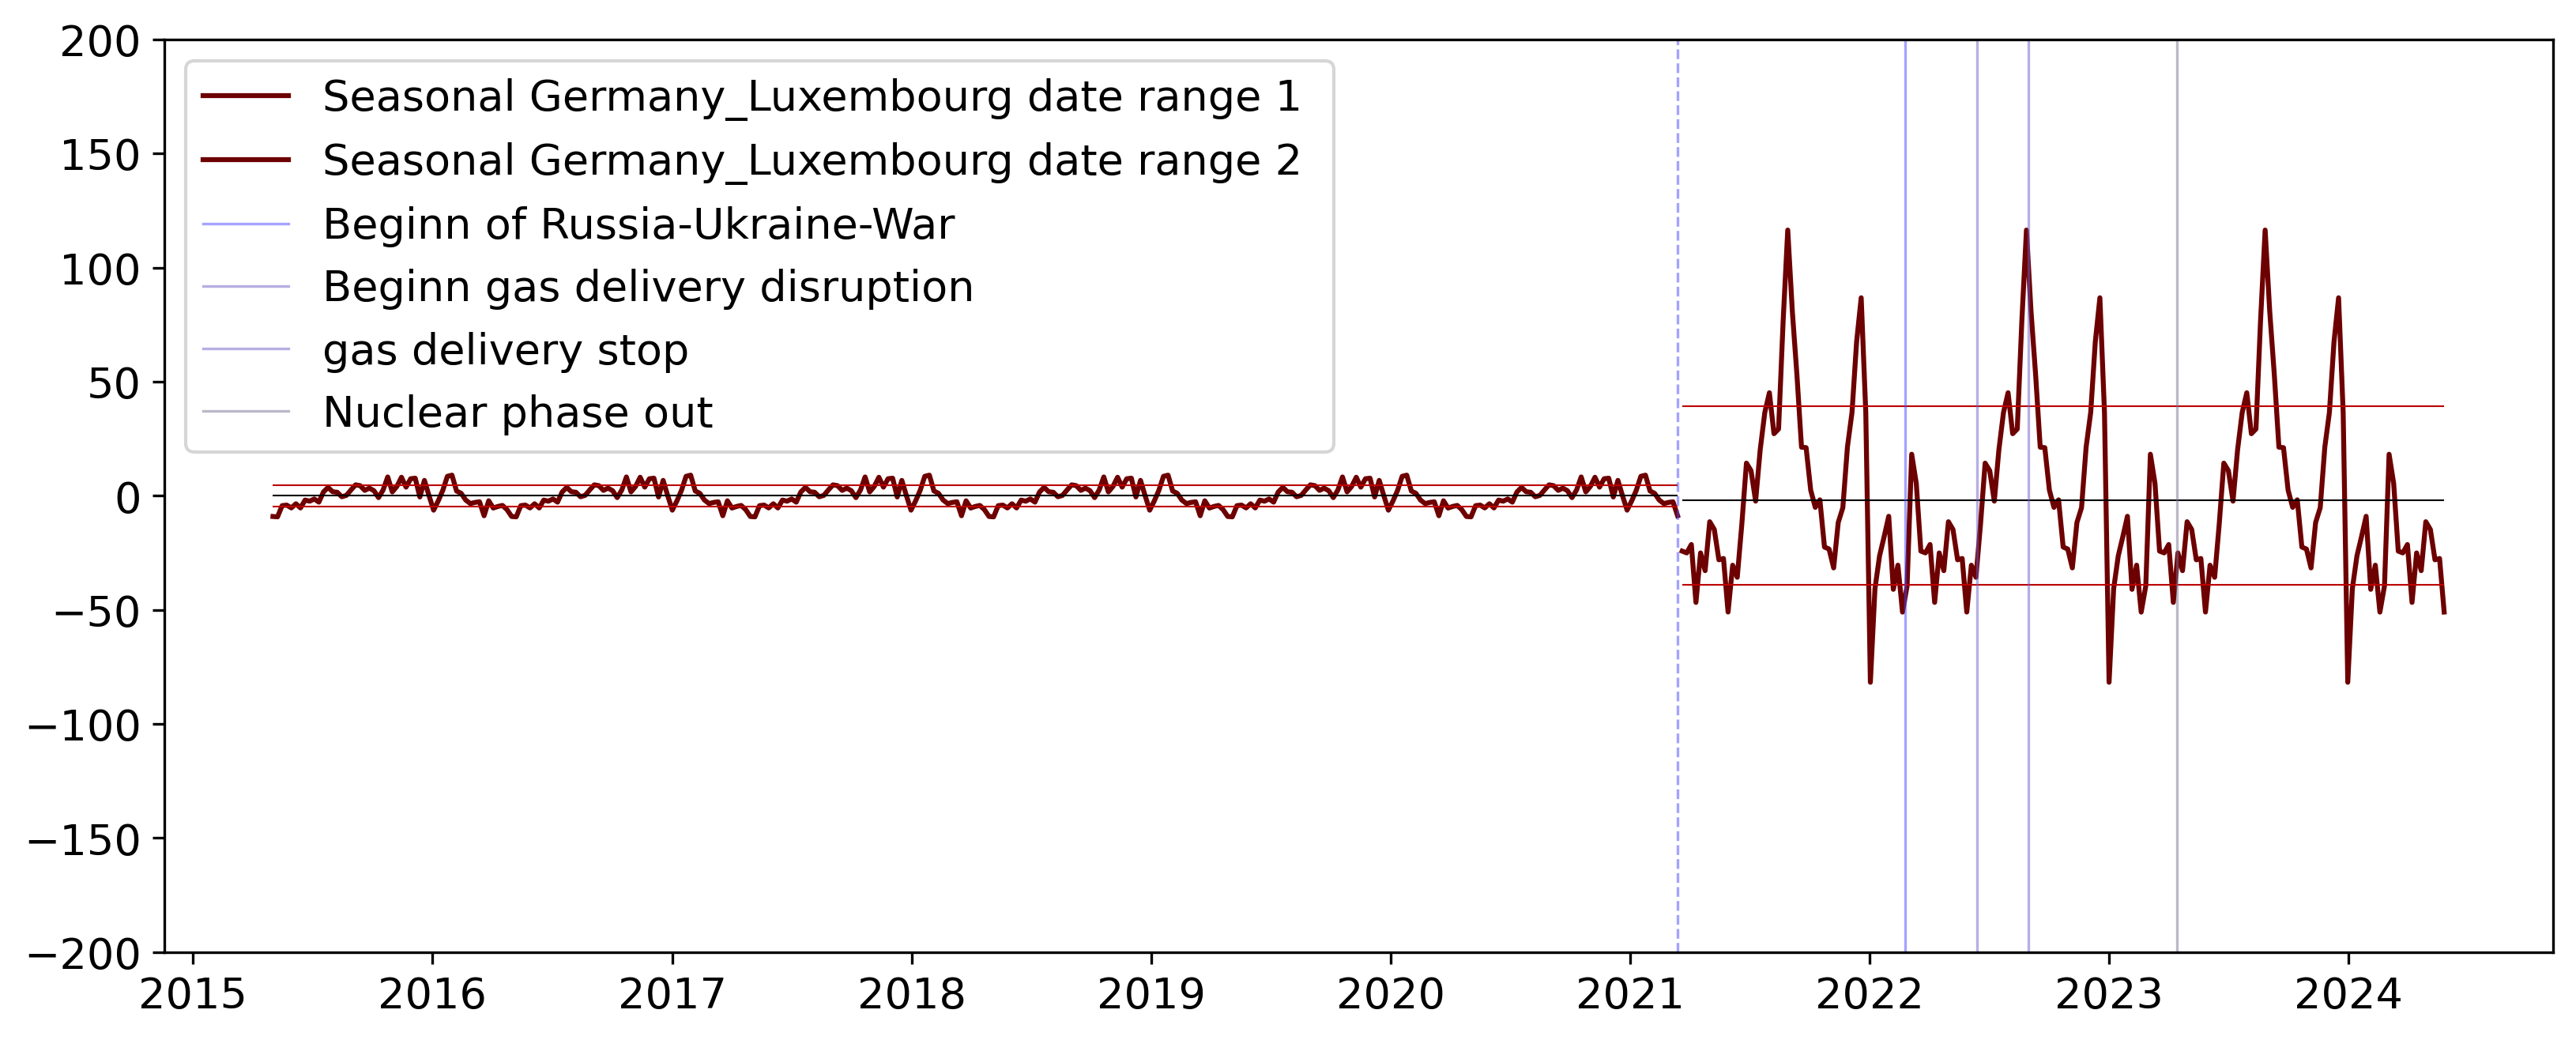

phase 1 mean: 0.07
phase 2 STD: +/- 4.7059 around 0.07
phase 2 mean: -1.84
phase 2 STD: +/- 39.1844 around -1.84


In [109]:

range1_mean = Prices_GER_weekly_date_range_1['Seasonal_adjusted'].mean()
range1_std = Prices_GER_weekly_date_range_1['Seasonal_adjusted'].std()

range2_mean = Prices_GER_weekly_date_range_2['Seasonal_adjusted'].mean()
range2_std = Prices_GER_weekly_date_range_2['Seasonal_adjusted'].std()

plt.figure(figsize= (13,5), dpi = 300)

# plt.plot(Prices_GER_monthly['Seasonal'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#000000', linewidth = 0.2)
plt.plot(Prices_GER_weekly_date_range_1['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg date range 1 ', color = '#6d0000')
plt.plot(Prices_GER_weekly_date_range_2['Seasonal_adjusted'], label = 'Seasonal Germany_Luxembourg date range 2 ', color = '#6d0000')





plt.hlines(y=range1_mean,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#000000')
plt.hlines(y=range2_mean,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#000000')


plt.hlines(y=range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range1_std,xmin=Prices_GER_weekly_date_range_1.index.min() ,xmax=Prices_GER_weekly_date_range_1.index.max(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')
plt.hlines(y=-range2_std,xmax=Prices_GER_weekly_date_range_2.index.max(),xmin=Prices_GER_weekly_date_range_2.index.min(), linewidth = 0.5, color = '#bc0000')

plt.vlines(x=date_range_change_dt, ymin=-200,ymax=200,color = '#4a48ff', alpha = .5, linewidth = .8, linestyles='--')



plt.ylim(-200,200)
plt.axvline(x=dt.datetime(2022,2,24),color = '#4a48ff', alpha = .5, linewidth = .8,  label = 'Beginn of Russia-Ukraine-War')
plt.axvline(x=dt.datetime(2022,6,14),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'Beginn gas delivery disruption')
plt.axvline(x=dt.datetime(2022,8,31),color = '#705ec9', alpha = .5, linewidth = .8,  label = 'gas delivery stop')
plt.axvline(x=dt.datetime(2023,4,15),color = '#7b7294', alpha = .5, linewidth = .8,  label = 'Nuclear phase out')
plt.legend()
plt.show()



print(f'phase 1 mean: {(range1_mean).round(2)}')
print(f'phase 2 STD: +/- {(range1_std).round(4)} around {(range1_mean).round(2)}')
print(f'phase 2 mean: {(range2_mean).round(2)}')
print(f'phase 2 STD: +/- {(range2_std).round(4)} around {(range2_mean).round(2)}')

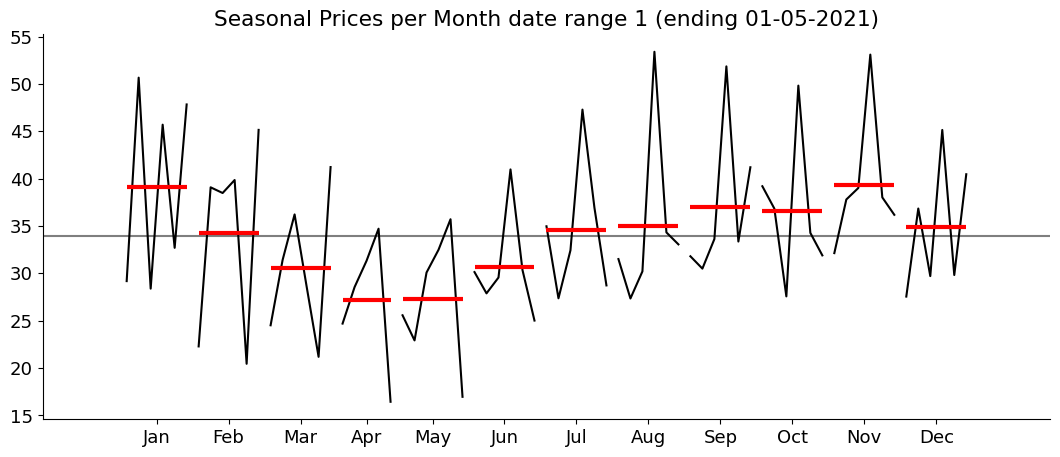

In [110]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 1 (ending 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_1['Germany_Luxembourg_adjusted'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

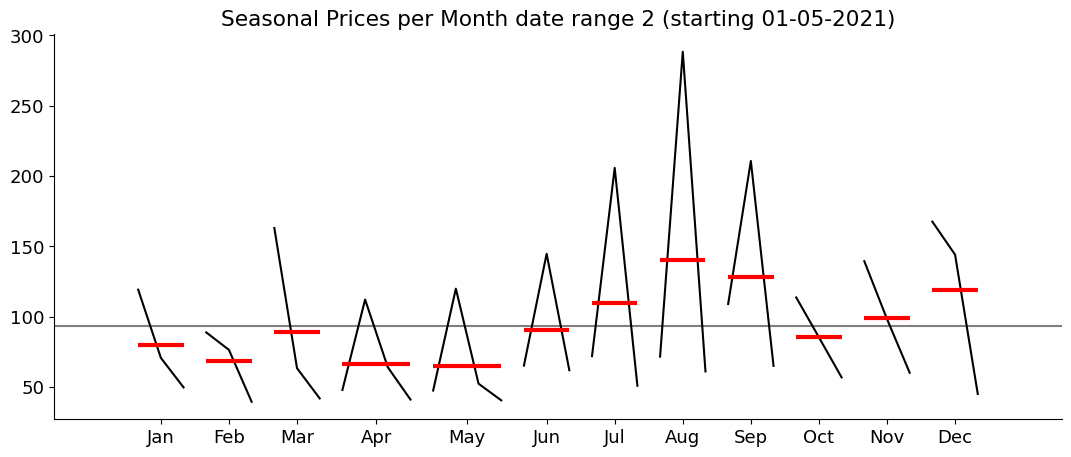

In [111]:
plt.figure(figsize=(13, 5))

month_plot(Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'], ax=plt.gca())
plt.title("Seasonal Prices per Month date range 2 (starting 01-05-2021)")
plt.axhline(y=Prices_GER_monthly_date_range_2['Germany_Luxembourg_adjusted'].mean(), color='#000000', alpha = .5)

sns.despine()
plt.show()

### Stationary Check

In [193]:
Prices_GER_weekly_date_range_1[['rolling_mean','rolling_std']] = rolling_mean_and_std(Prices_GER_weekly_date_range_1, 'Germany_Luxembourg_adjusted', window=8)
Prices_GER_weekly_date_range_2[['rolling_mean','rolling_std']] = rolling_mean_and_std(Prices_GER_weekly_date_range_2, 'Germany_Luxembourg_adjusted', window=8)

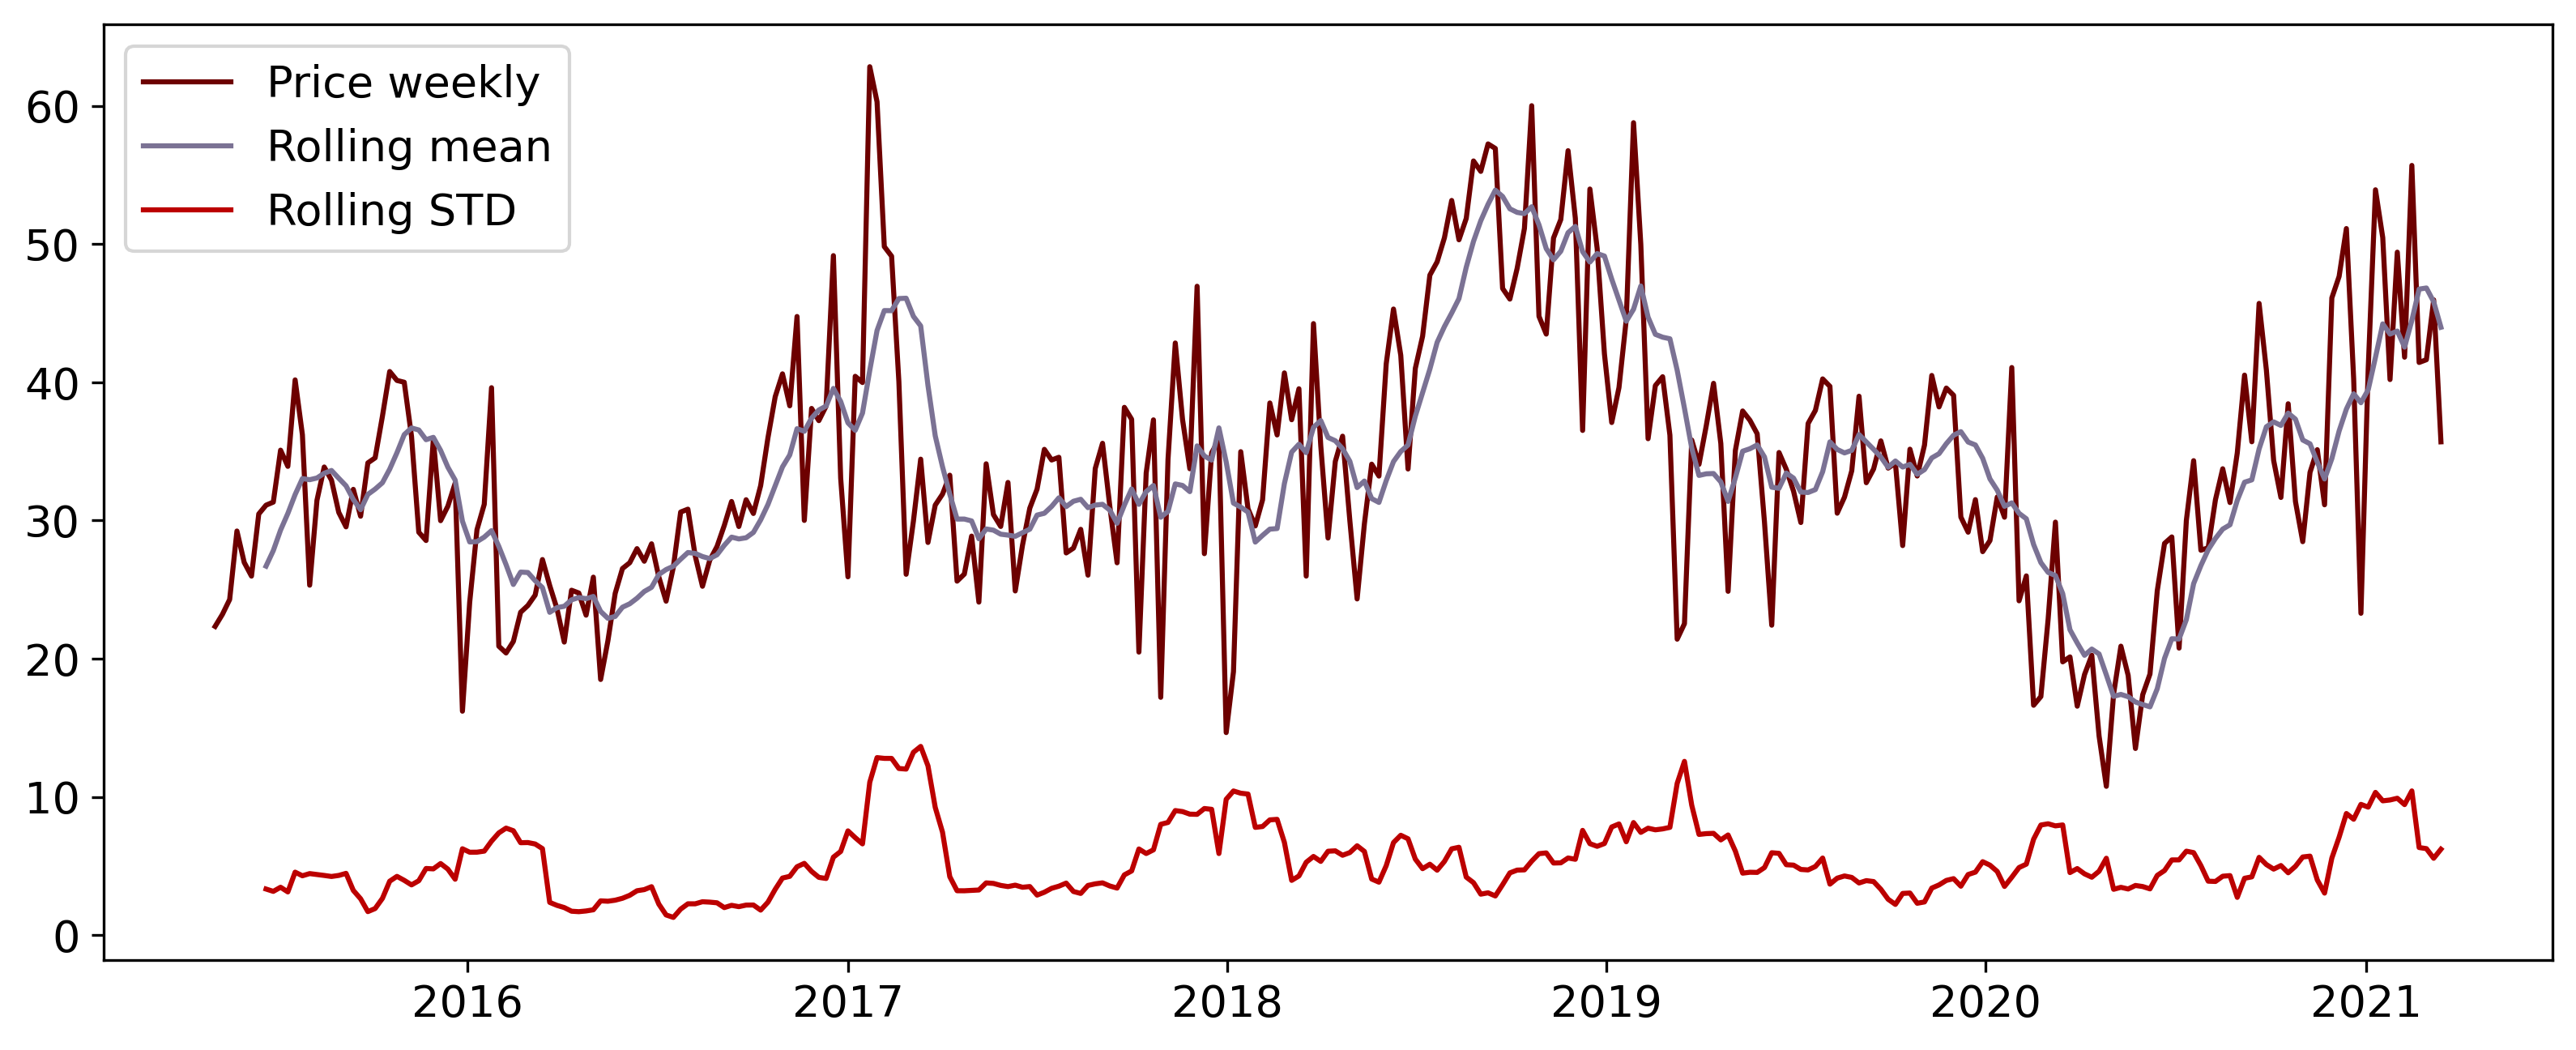

mean_Prices_GER_weekly_residual: 0.13
std_Prices_GER_weekly_residual: 24.51


In [194]:

plt.figure(figsize= (13,5), dpi = 300)

plt.plot(Prices_GER_weekly_date_range_1['Germany_Luxembourg_adjusted'], color = '#6d0000', label = 'Price weekly')
plt.plot(Prices_GER_weekly_date_range_1['rolling_mean'], color = '#7b7294', label = 'Rolling mean')
plt.plot(Prices_GER_weekly_date_range_1['rolling_std'], color = '#bc0000', label = 'Rolling STD')

plt.legend()
plt.title('')
plt.show()

print(f'mean_Prices_GER_weekly_residual: {(mean_Prices_GER_weekly_residual).round(2)}')
print(f'std_Prices_GER_weekly_residual: {(std_Prices_GER_weekly_residual).round(2)}')

- mean and std are not constant 
- mean and std seem follow a yearly trend

--> this looks not like a stationary trend

Therefore we performe the Augmented Dickey Fuller Test (ADF) and the Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS) to find out, if there is a root or a trend-stationary..

ADF-Test:

- Null hypothesis (H0): The time series is not stationary.

ADF-Statistic = -2.797 > -3.45 and 0.0586 > 0.05 


- Null hypothesis can't be rejected.

KPSS-Test:

- Null hypothesis (H0): The time series is stationary.

KPSS-Statistic = 0.2817 < 0.347 and 0.1 > 0.05 

- Null hypothesis can't be rejected




In [189]:
adf_test(Prices_GER_weekly_date_range_1, 'Germany_Luxembourg_adjusted')
kpss_test(Prices_GER_weekly_date_range_1, 'Germany_Luxembourg_adjusted')

Augmented Dickey Fuller Test:
                              
-------------------------------
ADF Statistic: -2.7976
p-value: 0.05861133
Number of lags:5
Number of observations:301
-------------------------------
Critical Values:
1%: -3.4523
5%: -2.8712
10%: -2.5719
-------------------------------
Kwiatkowski-Phillips-Schmidt-Shin test:
                              
-------------------------------
KPSS Statistic:: 0.2817
p-value: 0.1
Number of lags:10
-------------------------------
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
-------------------------------


C:\Users\BMidd\AppData\Local\Temp\ipykernel_9624\3105545752.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(time_series, regression='c', nlags='auto')


In [112]:
Prices_GER_weekly_date_range_1.to_csv('../data/Prices_GER_weekly_date_range_1.csv', index=True)
Prices_GER_monthly_date_range_1.to_csv('../data/Prices_GER_monthly_date_range_1.csv', index=True)
Prices_GER_weekly_date_range_2.to_csv('../data/Prices_GER_weekly_date_range_2.csv', index=True)
Prices_GER_monthly_date_range_2.to_csv('../data/Prices_GER_monthly_date_range_2.csv', index=True)